In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout, MaxPool2D
from tensorflow.keras.models import Sequential

In [18]:
df = pd.read_csv('fashion.csv')


In [19]:
df.shape

(60000, 1025)

In [20]:
df.head(10)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.000000,0.0,0.000000,...,0.498039,0.309804,0.054902,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.105882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.423529,0.611765,0.447059,0.160784,0.000000,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.003922,0.0,0.000000,...,0.011765,0.000000,0.262745,0.741176,0.917647,0.631373,0.188235,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5


In [21]:
df.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_1015', 'pixel_1016', 'pixel_1017', 'pixel_1018', 'pixel_1019',
       'pixel_1020', 'pixel_1021', 'pixel_1022', 'pixel_1023', 'label'],
      dtype='object', length=1025)

In [22]:
df.label

0        9
1        0
2        0
3        3
4        0
        ..
59995    5
59996    1
59997    3
59998    0
59999    5
Name: label, Length: 60000, dtype: int64

In [23]:
x = df.drop(['label'], axis=1)
y = df['label']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
x_train.shape

(42000, 1024)

In [26]:
x_train = x_train / 255

In [27]:
x_test.shape

(18000, 1024)

In [28]:
x_test =  x_test / 255

In [29]:
y.unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=int64)

In [30]:
len(y.unique())

10

In [31]:
x_train = x_train.to_numpy()

In [32]:
x_train = x_train.reshape(42000, 32, 32, 1)

In [33]:
x_test = x_test.to_numpy()

In [34]:
x_test = x_test.reshape(18000, 32, 32, 1)

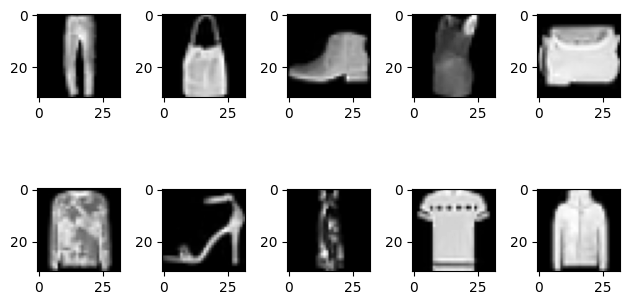

In [36]:
n_rows = 2
n_columns = 5

figure, axis = plt.subplots(nrows=n_rows, ncols=n_columns)

index = 0

for each_row in range(n_rows):
    for each_columns in range(n_columns):
        axis[each_row, each_columns].imshow(x_train[index].reshape(32, 32, 1), cmap= 'gray')
        index+=1
    plt.tight_layout()

In [37]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation= 'relu', input_shape= (32, 32, 1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (2,2), activation= 'relu',))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [39]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [40]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 5)

Epoch 1/5
1313/1313 [==============================] - 13s 9ms/step - loss: 1.0417 - accuracy: 0.6124 - val_loss: 0.7174 - val_accuracy: 0.7225
Epoch 2/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.6368 - accuracy: 0.7591 - val_loss: 0.5863 - val_accuracy: 0.7856
Epoch 3/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.5706 - accuracy: 0.7884 - val_loss: 0.5315 - val_accuracy: 0.8110
Epoch 4/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.5325 - accuracy: 0.8061 - val_loss: 0.5202 - val_accuracy: 0.8078
Epoch 5/5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.5048 - accuracy: 0.8176 - val_loss: 0.4861 - val_accuracy: 0.8246


Text(0, 0.5, 'loss')

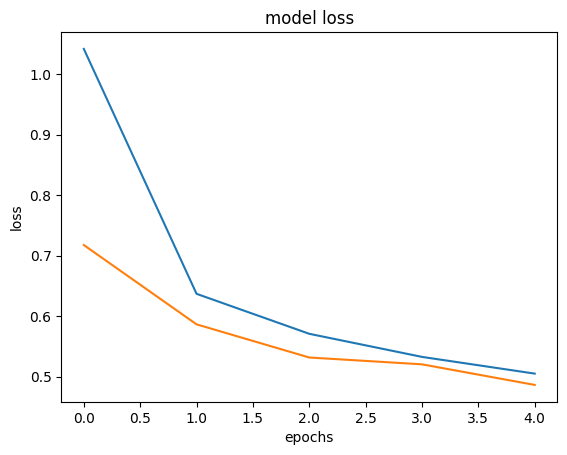

In [41]:
plt.plot(history.history['loss'], label= 'loss')
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

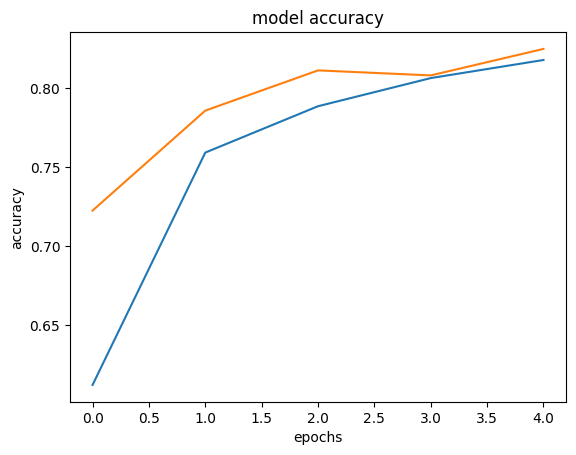

In [42]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')